## Import packages

In [1]:
import os
import sys
sys.path.append(os.path.join(".."))

# Import teaching utils
import numpy as np
import utils.classifier_utils as clf_util

# Import sklearn metrics
from sklearn import metrics
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Fetch data

We are going to use the mnist_784 dataset from the openML website. 

openML is an open repository for machine learning data that can be used for training machine learning models.

The mnist_784 is a well-known image dataset which has been used a lot of training models.

In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

There is a standard way of referring to data and labels in machine learning. We have two objects (X and y). <br>
X = the data <br>
y = the classes

In [ ]:
# Taking a sample of the data
X.sample(10)
# First column = image ID

^This is an index/array/grid of pixel intensities/features. Each column represents pixel value. 

Depending on the versions of ```pandas``` and ```sklearn``` that you're using, you may need to expressly convert these to ```numpy``` arrays.

In [4]:
# Converting to numpy arrays
X = np.array(X) # NB! X is uppercase. This is just convention within machine learning. Uppercase letters refer to data, while lowercase letters refer to labels
y = np.array(y)

__Predifine classes and number of classes__

We want to create two objects. The first is a list of all the classes in the data. The second is the number of total classes that we have in the data. 

In [5]:
classes = sorted(set(y))
nclasses = len(classes)

__Plot random sample__

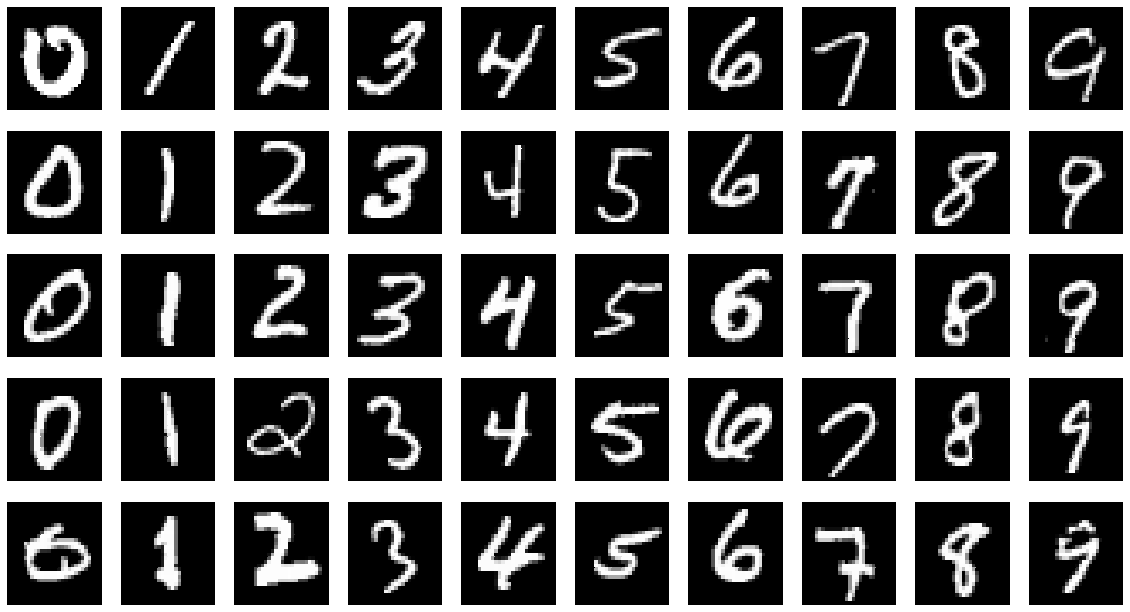

In [6]:
# We can visualize what the data looks like by taking a sample of 5 random samples of each class in the data
clf_util.plot_sample(X, y, classes, 5) # X = raw dataset, y = labels

This is what the data looks like. The images are very pixelated, because they are only 28x28 (compact images). They consist of binary values: black = 0, white = 1. 

## Create training and test dataset

We can use the train_test_split() function from sklearn to create training and test data for us. We create four objects with this function. While X is the full dataset, y is the classes, and we split these up into training and test data. Hence, we split up both the data and the labels. This is ugly but this is how it is done. 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, # our data (arrays of values used to make the images)
                                                    y, # labels
                                                    random_state=9, # we define a random state in order to be able to reproduce the results and not get a different sample
                                                    train_size=7500, # this is not the full dataset - it is just a small sample
                                                    test_size=2500)

Instead of specifying how many datapoints we want as raw numbers (e.g. 7500 for training and 2500 for test), we could also have used float numbers to define a percentage of the dataset to use (e.g. 0.8 and 0.2).

__Scaling features__

We should also scale the features

In [23]:
# Index 10 in the training data
X_train[10]
# What we can see is that the higher numerical values correspond to the points in the image where something is being draw (hence, where the pixel is white or grey)
# We can use these pixel intensities as our features when perfomring feature extracting

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [8]:
# We can take the pixel intensities and use them as features and train our classifier on these pixel intensities
# First we need to scale the features by diving with 255
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0
# Why are we dividing with 255?
# Because we want to normalize and compress it into a space. Instead of being between 0 and 255 the intensities are now between 0 and 1. 
# This makes it easier for the classifier to converge more optimally - there is less variability between 0 and 1 than between 0 and 255.

In [25]:
# Now the distribution looks different. The pixel intensities have been compressed down to vary between 0 and 1 instead of 0 and 255.
X_train_scaled[10]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Train a logistic regression model

Now we need to define a model. We will use a logistic regression model. 

In [9]:
# Defining the model using sklearn LogisticRegression and fitting the model to the training data and training labels
clf = LogisticRegression(penalty='none', 
                         tol=0.1, # tolerance
                         solver='saga', # type of algorithm used to solve classification problem
                         multi_class='multinomial').fit(X_train_scaled, y_train) # we use a multinomial model

clf = "classifier"

This model looks for correlation and patterns in the scaled training data and correspondences between the data and the labels.

In [10]:
# Check the shape of the coefficient matrix
clf.coef_.shape

(10, 784)

Here we have a matrix with the shape of 10 by 784. Hence, it is an array of coefficient for each class.
Coefficients are weights in the model that hte model assigns to individual features.

In [27]:
# Inspecing the weights/coefficients for each feature for predicting class 0
clf.coef_[0]
# Here we can see that for each of the points in the array we have a value that corresponds to the weight/importance of that specific feature when predicting class 0. 
# Hence, the higher the value is the more informative that feature is for predicting class 0

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -9.88082053e-08, -2.13425723e-06, -2.13425723e-06, -8.89273847e-08,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.19510979e-05,
       -3.03752380e-05, -2.87996136e-05, -9.05908009e-05, -1.02968374e-03,
       -9.48563605e-04, -1.59259195e-04, -1.81210048e-04, -7.31978905e-05,
       -8.45476681e-05, -2.20463044e-05, -2.56973182e-06, -4.62365643e-06,
       -3.33342748e-06, -1.14442592e-07, -5.21319704e-08, -4.24988889e-09,
        0.00000000e+00,  

## Interpreting the coefficients

We can plot the coefficients for our model, showing which 'features' are most informative when it comes to predicting each class

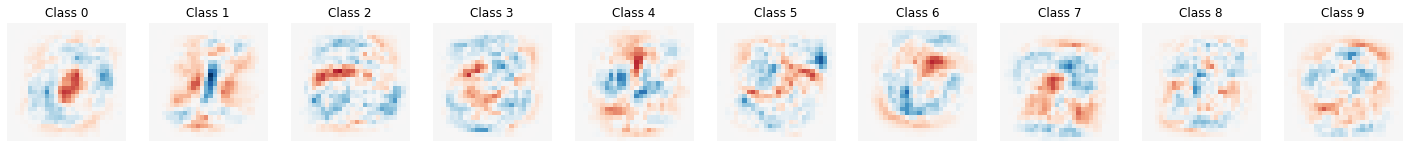

In [11]:
clf_util.plot_coefs(clf.coef_, nclasses) # this is a way of visualizing the weights

^Here we have a visual representation of each class and the weights of each feature. Here we can then see what the most informative features are in terms of predicting the different classes.

Red = low importance. It is still "important" but opposite of the blue <br>
Blue = high importance. Blue areas are areas where the feature is hihgly informative for that particular class. Hence, if we have a shape that falls into the blue area, we know that we are dealing with that class. 

We can actually see the numbers.

This model of course will work best if the numbers are centered.

## Individual predictions

We can then use this model to predict the class of an individual data point.
For this we use the function ```plot_individual()```

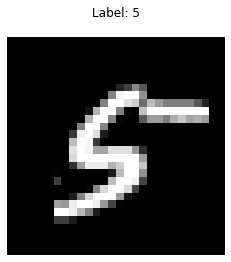

In [12]:
# Taking one individual data point form the test data and the corresponding label 
clf_util.plot_individual(X_test_scaled, y_test, 50)

## Show the distribution of probabilities

We can compute the conditional probability for each class and then plot the probability distribution.
This shows us the probability of this image belonging to any class

I think that this is class 5


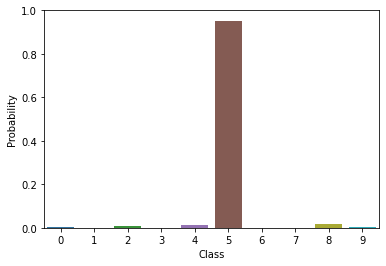

In [13]:
# We take the scaled data and point number 50 which is the same as above, the classifier, and the classes/labels
clf_util.plot_probs(X_test_scaled, 50, clf, classes)

We can find the class with the highest probability. 

If this matches the actual label for the first test sample, then our prediction is correct.
The model just takes class with the highest probability as the one it predicts the data point to belong to. 

## Accuracy: Evaluating on the whole training data

We can calculate predictions for all the scaled test data. 

In [14]:
# We use the predict method from sklearn to predict the class of every datapoint in the scaled test data.
y_pred = clf.predict(X_test_scaled)

In [28]:
# inspecing the first 10
y_pred[:10]
# These are the predictiosn for the first 10 data points

array(['1', '5', '9', '7', '9', '2', '8', '7', '3', '8'], dtype=object)

In [29]:
len(y_pred)
# We have 2500 predictions 

2500

We then calculate metrics for accuracy based on comparing the predicted labels with the actual labels.

In [15]:
#method 2
accuracy = accuracy_score(y_test, y_pred) # getting an accuracy score by comparing the labels we know are correct with the predicted labels made by the model
print(accuracy)

0.9068


The model has an accuracy of 0.9. Even though this is quite high, the model might still constitently consider a 9 to be a 5 which is a problem. Hence, we can calculate a better accuracy measure.

__A better accuracy measure__

In [16]:
# Using classification_report() to construct a detail report showing different evalution metids
cm = metrics.classification_report(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       244
           1       0.91      0.97      0.94       287
           2       0.89      0.91      0.90       235
           3       0.91      0.86      0.89       281
           4       0.89      0.95      0.92       213
           5       0.86      0.82      0.84       215
           6       0.95      0.92      0.93       225
           7       0.93      0.92      0.93       257
           8       0.83      0.88      0.85       253
           9       0.92      0.87      0.90       290

    accuracy                           0.91      2500
   macro avg       0.91      0.91      0.91      2500
weighted avg       0.91      0.91      0.91      2500



The F1-scores are high except for some classes (class 3, 5, 8). Across all the data the weighted average is 0.91, which means that for any datapoint we have a 91% accuracy. 

This can be visualised using a confusion matrix

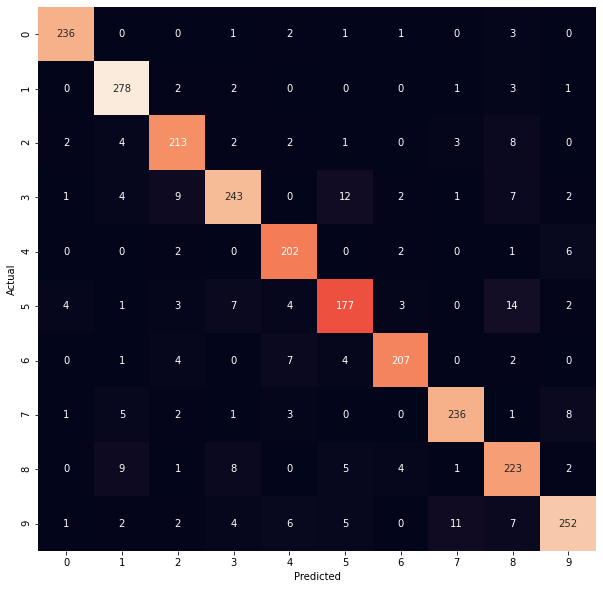

In [17]:
# We visualize the difference between actual labels and predictions as a heat map
clf_util.plot_cm(y_test, y_pred, normalized=False)

^Here we have confusion matrix. This correspond to the confusion matrix we saw in the lecture. Here we can actually see the false positive and false negative as well as the true negatives and true positives. 

True negative = it is predicted as something else than it it

We can also normalize the confusion matrix to show percentages instead of raw values

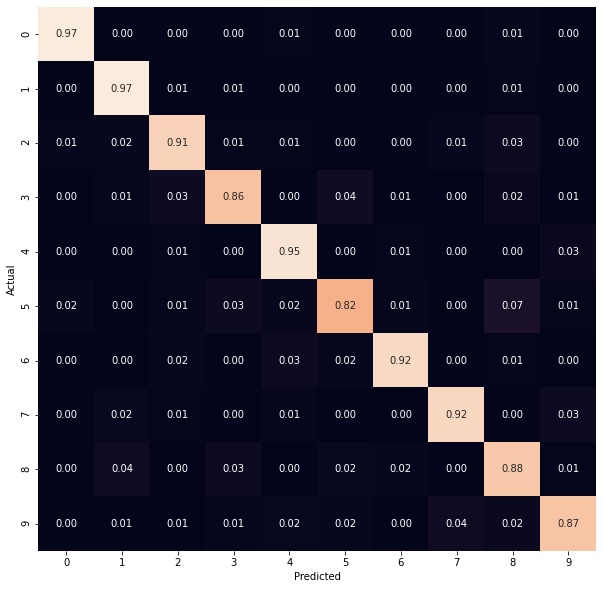

In [30]:
# Here we normalize the scores to be percentages instead of raw counts
clf_util.plot_cm(y_test, y_pred, normalized=True)

## Test on new data

In [19]:
import cv2
import matplotlib.pyplot as plt

In [35]:
# This is a 4 that Ross hand-wrote himself
file_path = os.path.join("..", "data", "cf_test", "test.png")
test_image = cv2.imread(file_path)

In [37]:
test_image.shape

(1080, 1920, 3)

We can see that the image has 3 channels. We do not want three color channels. We want a greyscale image, which is why we convert it to greyscale below.

Use bitwise not to invert regular grayscale

"Bitwise not" = used to invert the color scale. Hence we can use it to invert from color to greyscale.

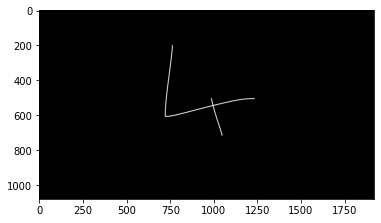

In [38]:
gray = cv2.bitwise_not(cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY))
plt.imshow(gray, cmap=plt.cm.gray)

__Compressing image to 28x28__

Resize down to 28x28 image

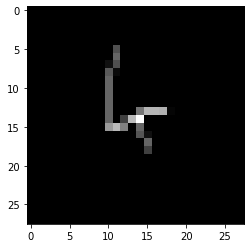

In [39]:
compressed = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA)
plt.imshow(compressed, cmap=plt.cm.gray)

Now the image has been compressed so that it matches the other images that we have used. 

Now let's see what our model classifies this as

I think that this is class 4


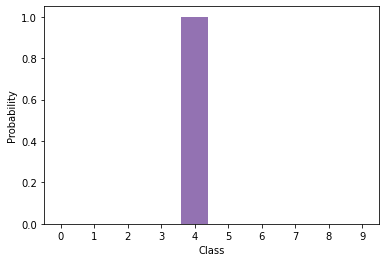

In [40]:
clf_util.predict_unseen(compressed, clf, classes)

Hence, as long as we have images in the same format as the model was trained on, then the model can classify it. 

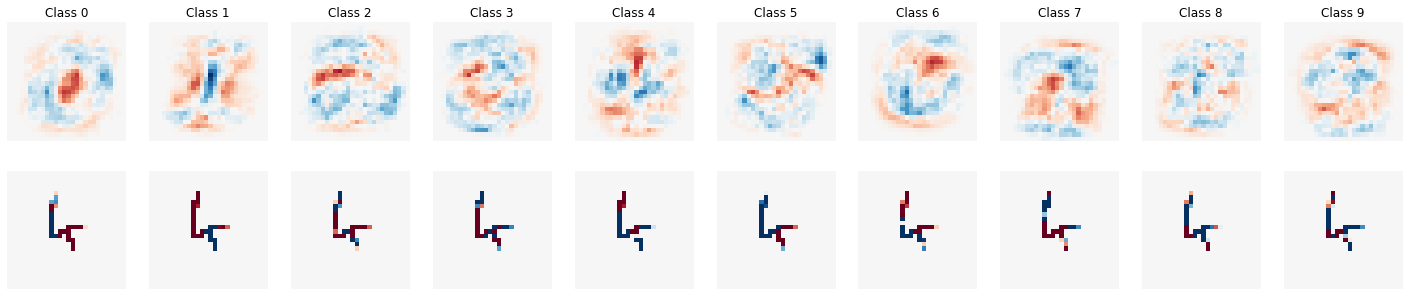

In [41]:
clf_util.prediction_coefficients(compressed, clf, classes)

__Problems__ <br>
The data we used is very artificial, whihc means that the model might not generalize that well. 